 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [171]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [172]:
# Reading whale returns
whale_returns = pd.read_csv('whale_returns.csv', 
parse_dates=True, infer_datetime_format=True, index_col='Date')
whale_returns.sort_index(inplace=True
)

In [173]:
# Count nulls
whale_returns.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [174]:
# Drop nulls
whale_returns.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [175]:
# Reading algorithmic returns
algo_return = pd.read_csv('algo_returns.csv', 
parse_dates=True, infer_datetime_format=True, index_col='Date')
algo_return.sort_index(inplace=True)

In [176]:
# Count nulls
algo_return.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [177]:
# Drop nulls
algo_return.dropna(inplace=True)

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [178]:
# Reading S&P 500 Closing Prices
sp_500 = pd.read_csv('sp500_history.csv', 
parse_dates=True, infer_datetime_format=True, index_col='Date')
sp_500 = sp_500.sort_index()

In [179]:
# Check Data Types
type(sp_500)

pandas.core.frame.DataFrame

In [180]:
# Fix Data Types
sp_500['Close'] = sp_500['Close'].str.replace('$', "")
# set close as a float instead of a string
sp_500['Close'] = sp_500['Close'].astype("float")

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_18848/1839819840.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_500['Close'] = sp_500['Close'].str.replace('$', "")


In [181]:
# Calculate Daily Returns
sp_500_returns = sp_500['Close'].pct_change()

In [182]:
# Drop nulls
sp_500_returns.dropna(inplace=True)

In [183]:
# Rename `Close` Column to be specific to this portfolio.
sp_500_returns.rename(columns={"Close":"S&P 500"})

TypeError: rename() got an unexpected keyword argument 'columns'

## Combine Whale, Algorithmic, and S&P 500 Returns

In [ ]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns, algo_return,sp_500_returns], axis='columns', join='inner')

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

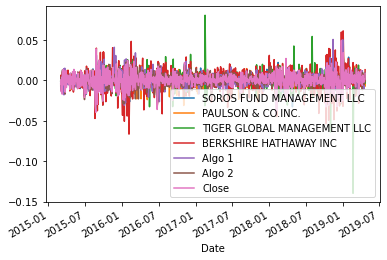

In [ ]:
# Plot daily returns of all portfolios
combined_returns.plot()

#### Calculate and Plot cumulative returns.

In [ ]:
# Calculate cumulative returns of all portfolios
combined_cum = (1 + combined_returns).cumprod().plot()
# Plot cumulative returns


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


In [ ]:
# Box plot to visually show risk
combined_returns.plot.box(figsize=(20,10), title = "Portfolios Risk")


### Calculate Standard Deviations

In [ ]:
# Calculate the daily standard deviations of all portfolios
combined_std = combined_returns.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
Close                          0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [ ]:
# Calculate  the daily standard deviation of S&P 500

# Determine which portfolios are riskier than the S&P 500
S_P_std = combined_returns['S&P 500'].std()

combined_returns.std() > S_P_std

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_returns.std() * np.sqrt(252)

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

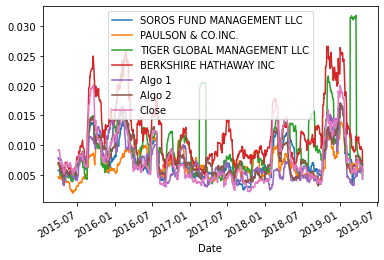

In [ ]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_rolling_std = combined_returns.rolling(window=21).std().plot()

# Plot the rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate the correlation
correlation = combined_returns.corr()

# Display de correlation matrix
correlation.style.background_gradient()


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

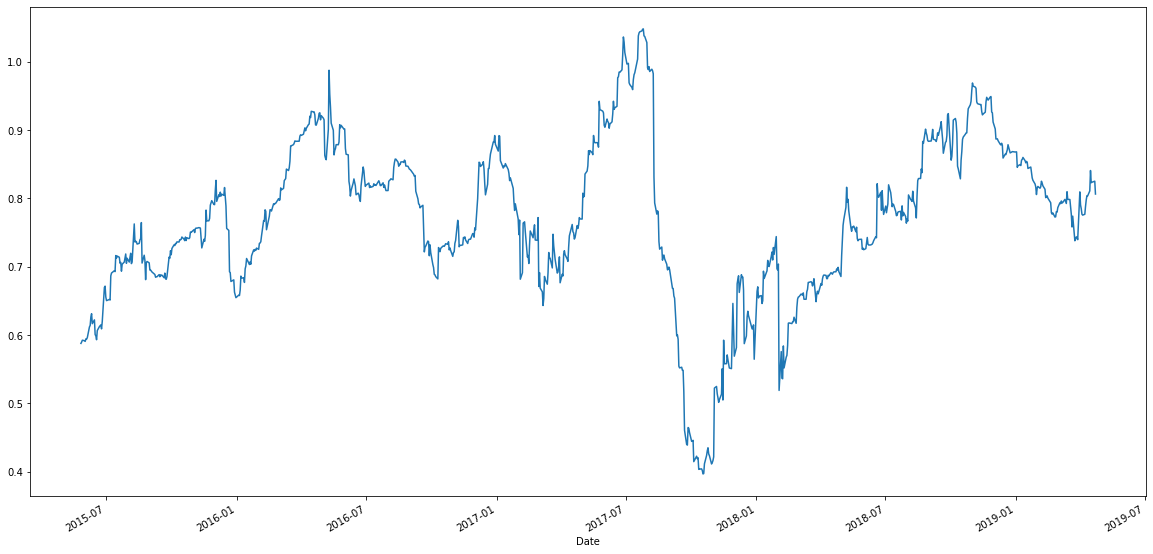

In [ ]:
combined_returns = combined_returns.rename(columns={'Close': 'S&P 500'})

# Calculate covariance of a single portfolio
sorros_covariance = combined_returns['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(combined_returns['S&P 500'])

# Calculate variance of S&P 500
SP_variance = combined_returns['S&P 500'].rolling(window=60).var()

# Computing beta
Sorors_beta_rolling = sorros_covariance / SP_variance

# Plot beta trend
Sorors_beta_rolling.plot(figsize=(20,10))


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [ ]:
# Use `ewm` to calculate the rolling window
combined_returns.ewm(halflife=21).std().plot(figsize=(20,10))


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios
sharpe_ratio = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252)) 


In [ ]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar')

# Algo 1 outperforms all other strategies including the S&P 500
# Algo 2 also outperforms MOST of the other strategies with the S&P and Berkshire being the only exceptions
# to that

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# Reading data from 1st stock
aapl_csv = pd.read_csv('aapl_historical.csv', parse_dates=True, infer_datetime_format=True, index_col="Trade DATE")


In [ ]:
# Reading data from 2nd stock
cost_csv = pd.read_csv('cost_historical.csv', parse_dates=True, infer_datetime_format=True, index_col="Trade DATE")


In [ ]:
# Reading data from 3rd stock
goog_csv = pd.read_csv('goog_historical.csv', parse_dates=True, infer_datetime_format=True, index_col="Trade DATE")


In [ ]:
# Combine all stocks in a single DataFrame
new_combined_returns = pd.concat([aapl_csv,cost_csv,goog_csv], axis='columns', join='inner')


In [ ]:
# Reset Date index
new_combined_returns.sort_index(inplace=True)

In [ ]:
# Reorganize portfolio data by having a column per symbol
new_combined_returns.columns = ['AAPL', 'COST', 'GOOG']

ValueError: Length mismatch: Expected axis has 6 elements, new values have 3 elements

In [ ]:
# Calculate daily returns
new_combined_returns = combined_returns.pct_change()

# Drop NAs
new_combined_returns.dropna()

# Display sample data
new_combined_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766,-0.033072
2015-03-05,0.800968,0.257544,-1.929234,0.596558,-0.888803,0.789231,-1.272547
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282,4.190043,-3.650914,-12.850368
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840,0.098917,-1.113716,-1.278290
...,...,...,...,...,...,...,...
2019-04-16,-2.898341,-1.335693,-3.088322,-1.079744,0.603391,-1.634218,-1.809253
2019-04-17,-2.073108,-17.661104,4.306537,2.851033,0.483294,-2.803170,-5.463942
2019-04-18,-1.499843,-1.188925,-1.131886,-0.405345,-0.942926,-0.764890,-1.694469


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_return = new_combined_returns.dot(weights)
# Display sample data
weighted_return

ValueError: Dot product shape mismatch, (1043, 7) vs (3,)

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame
all_total_returns = pd.concat([combined_returns, new_combined_returns], axis='columns', join='inner')

In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_total_returns.dropna(inplace=True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`
total_annualized_std = all_total_returns.std() * np.sqrt(252)


SOROS FUND MANAGEMENT LLC          0.126183
PAULSON & CO.INC.                  0.112219
TIGER GLOBAL MANAGEMENT LLC        0.174110
BERKSHIRE HATHAWAY INC             0.206437
Algo 1                             0.121461
Algo 2                             0.132597
S&P 500                            0.136080
SOROS FUND MANAGEMENT LLC               NaN
PAULSON & CO.INC.                       NaN
TIGER GLOBAL MANAGEMENT LLC             NaN
BERKSHIRE HATHAWAY INC                  NaN
Algo 1                           250.907325
Algo 2                         10897.582222
S&P 500                                 NaN
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

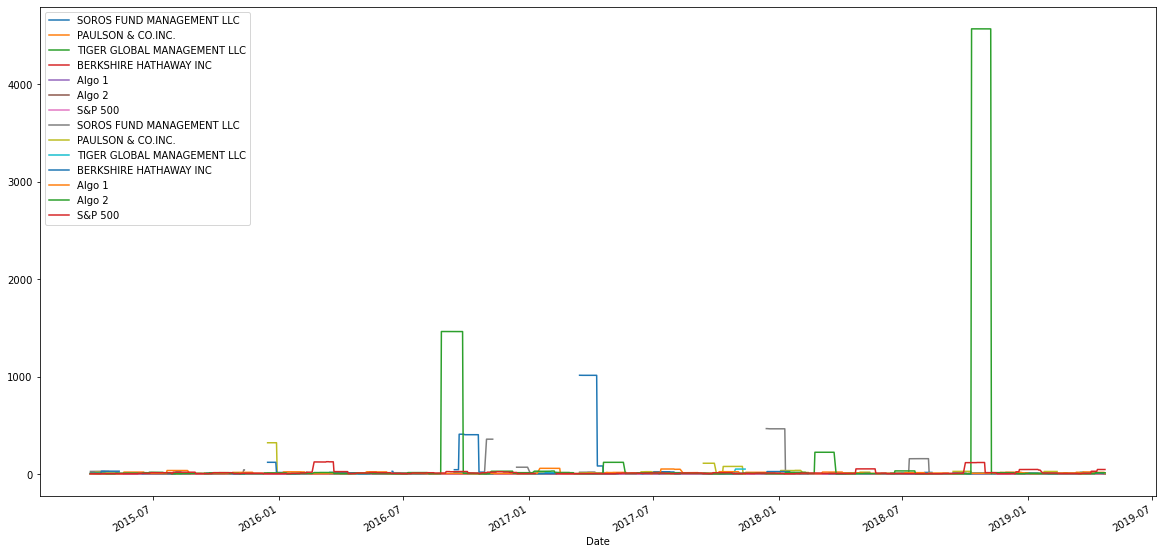

In [ ]:
# Calculate rolling standard deviation
all_total_returns.rolling(window=21).std().plot(figsize=(20,10))
# # Plot rolling standard deviation


### Calculate and plot the correlation

<AxesSubplot:>

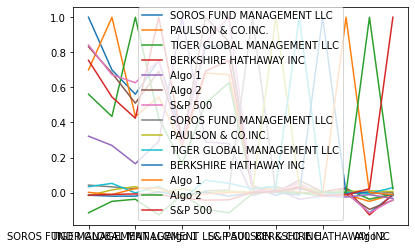

In [ ]:
# Calculate and plot the correlation
all_total_returns.corr().plot()

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:xlabel='Date'>

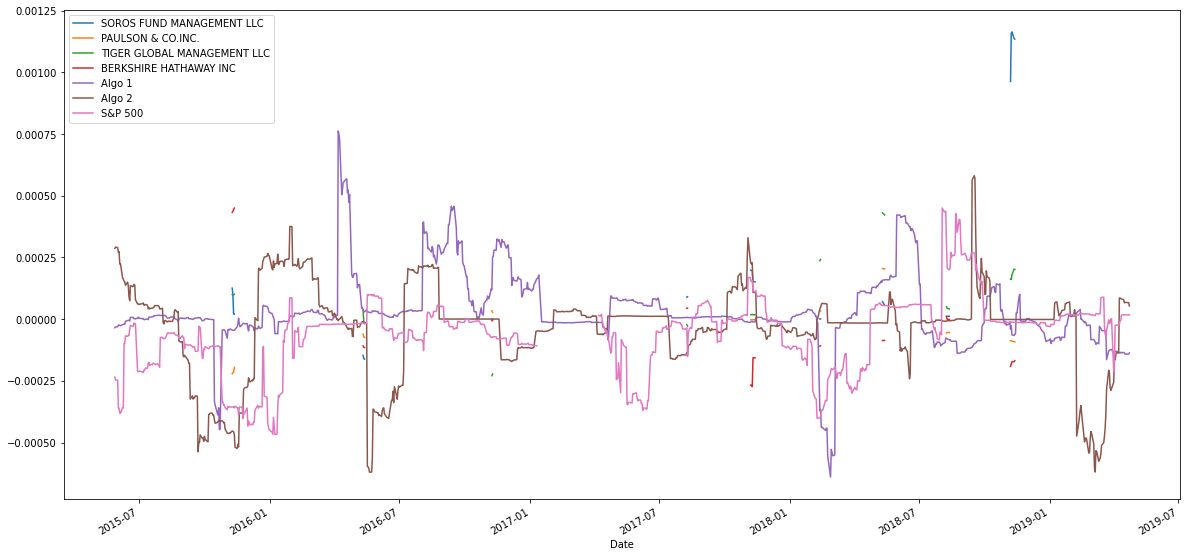

In [184]:
# Calculate and plot Beta
portfolio_variance = new_combined_returns.rolling(window=60).var()
portfolio_covariance = new_combined_returns.rolling(window=60).cov(combined_returns['S&P 500'])
portfolio_beta = portfolio_covariance / portfolio_variance
portfolio_beta.plot(figsize=
(20,10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [185]:
# Calculate Annualized Sharpe Ratios
Portfolio_sharpe_ratio = (new_combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252)) 
Portfolio_sharpe_ratio

SOROS FUND MANAGEMENT LLC               NaN
PAULSON & CO.INC.                       NaN
TIGER GLOBAL MANAGEMENT LLC             NaN
BERKSHIRE HATHAWAY INC                  NaN
Algo 1                        -1.536856e+03
Algo 2                         2.208900e+04
S&P 500                                 inf
dtype: float64

<AxesSubplot:>

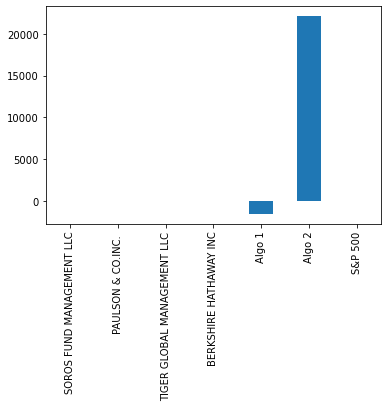

In [186]:
# Visualize the sharpe ratios as a bar plot
Portfolio_sharpe_ratio.plot(kind='bar')

### How does your portfolio do?

Write your answer here!

In [ ]:
Overall the created portfolio does well in camparison to other whales but the algorithm's do the best.